**Business Problem**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project Objective:

To generate insights to help XYZ identify the right company to make their investment.

In next sections we will analyze data in the following process:

Data Intake and Preliminary Processing
Compare Yellow Cab and Pink Cab from different aspects
Investment Recommendation

**2. Data Intake and Preliminary Processing**

First of all, we import all the packages that are required in this project.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

In [ ]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_Data = pd.read_csv('Customer_ID.csv')
Transaction_Data = pd.read_csv('Transaction_ID.csv')
City_Data = pd.read_csv('City.csv')

In [ ]:
Cab_Data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07-01-2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03-01-2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07-01-2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12-01-2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06-01-2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [ ]:
Customer_Data.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [ ]:
Transaction_Data.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [ ]:
City_Data.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [ ]:
Cab_Data.info()
Customer_Data.info()
Transaction_Data.info()
City_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344749 entries, 0 to 344748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  344749 non-null  int64  
 1   Date of Travel  344749 non-null  object 
 2   Company         344749 non-null  object 
 3   City            344749 non-null  object 
 4   KM Travelled    344748 non-null  float64
 5   Price Charged   344748 non-null  float64
 6   Cost of Trip    344748 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 18.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [ ]:
print(Cab_Data.describe())
print(Customer_Data.describe())
print(Transaction_Data.describe())
print(City_Data.describe())


       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.447490e+05  344748.000000  344748.000000  344748.000000
mean     1.021183e+07      22.567767     424.032555     286.159816
std      1.216796e+05      12.232047     275.171995     157.951438
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.010653e+07      12.000000     206.637500     151.257600
50%      1.021237e+07      22.440000     386.580000     282.464000
75%      1.031692e+07      32.960000     584.430000     413.683200
max      1.042208e+07      48.000000    2048.030000     691.200000
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000

In [ ]:
# Prepare Cab_data for merging
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])
Cab_Data = Cab_Data.rename(columns = {'Date of Travel': 'Date'})
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344749 entries, 0 to 344748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  344749 non-null  int64         
 1   Date            344749 non-null  datetime64[ns]
 2   Company         344749 non-null  object        
 3   City            344749 non-null  object        
 4   KM Travelled    344748 non-null  float64       
 5   Price Charged   344748 non-null  float64       
 6   Cost of Trip    344748 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 18.4+ MB


<ipython-input-16-db39aad84d63>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])


In [ ]:
Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID').merge(City_Data, on = 'City')
missing_value = 0
for column in Merged_Data.columns :
    missing_value += Merged_Data[column].isna().sum() + Merged_Data[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(Merged_Data.shape[0] ,Merged_Data.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(Merged_Data.dtypes))

Merged dataset has 344748 entries , 14 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
dtype: object


In [ ]:
Merged_Data.tail(10)

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
344738,10377450,2018-12-09,Yellow Cab,WASHINGTON DC,4.32,65.19,51.8400,51078,Cash,Male,21,8810,"418,859","127,001"
344739,10388121,2018-04-10,Yellow Cab,WASHINGTON DC,13.56,198.27,172.4832,51078,Card,Male,21,8810,"418,859","127,001"
344740,10274704,2017-06-12,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,52614,Card,Female,44,8303,"418,859","127,001"
344741,10311299,2018-03-15,Yellow Cab,WASHINGTON DC,13.56,241.43,165.9744,52614,Card,Female,44,8303,"418,859","127,001"
344742,10284072,2017-12-17,Yellow Cab,WASHINGTON DC,44.00,679.97,607.2000,51406,Cash,Female,29,6829,"418,859","127,001"
344743,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
344744,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
344745,10347676,2018-06-07,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
344746,10358624,2018-02-08,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"
344747,10370709,2018-08-30,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406,Card,Female,29,6829,"418,859","127,001"


In [ ]:
# data cleaning
for column in Merged_Data.columns:
    if ' ' in column:
        Merged_Data = Merged_Data.rename(columns={column:column.replace(' ','_')})
for column in ["Population","Users"] :
    Merged_Data[column] = Merged_Data[column].astype(str)
    Merged_Data[column] = Merged_Data[column].str.replace(',','')
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    Merged_Data[column] = Merged_Data[column].astype('category')
for column in ["Population", "Users"] :
    Merged_Data[column] = Merged_Data[column].astype('int64')
# Merged_Data['Holiday'] = Merged_Data['Holiday'].astype('bool')
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344748 entries, 0 to 344747
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      344748 non-null  int64         
 1   Date                344748 non-null  datetime64[ns]
 2   Company             344748 non-null  category      
 3   City                344748 non-null  category      
 4   KM_Travelled        344748 non-null  float64       
 5   Price_Charged       344748 non-null  float64       
 6   Cost_of_Trip        344748 non-null  float64       
 7   Customer_ID         344748 non-null  int64         
 8   Payment_Mode        344748 non-null  category      
 9   Gender              344748 non-null  category      
 10  Age                 344748 non-null  int64         
 11  Income_(USD/Month)  344748 non-null  int64         
 12  Population          344748 non-null  int64         
 13  Users               344748 no

In [ ]:
# Derive some interested features for later analysis
Merged_Data['Year'] = Merged_Data['Date'].dt.year
Merged_Data['Month'] = Merged_Data['Date'].dt.month
Merged_Data['Profit'] = Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip']
Merged_Data['Profit_Rate'] = ((Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip'])/Merged_Data['Cost_of_Trip'])*100
Merged_Data['Profit_per_KM'] = Merged_Data['Profit']/ Merged_Data['KM_Travelled']
Merged_Data['User_Ratio'] = Merged_Data['Users']/Merged_Data['Population']*100
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344748 entries, 0 to 344747
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      344748 non-null  int64         
 1   Date                344748 non-null  datetime64[ns]
 2   Company             344748 non-null  category      
 3   City                344748 non-null  category      
 4   KM_Travelled        344748 non-null  float64       
 5   Price_Charged       344748 non-null  float64       
 6   Cost_of_Trip        344748 non-null  float64       
 7   Customer_ID         344748 non-null  int64         
 8   Payment_Mode        344748 non-null  category      
 9   Gender              344748 non-null  category      
 10  Age                 344748 non-null  int64         
 11  Income_(USD/Month)  344748 non-null  int64         
 12  Population          344748 non-null  int64         
 13  Users               344748 no

**3. Compare Yellow Cab and Pink Cab from Different Aspects**


In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

3.1 What's the profit rate of Cab market? Which company has higher profit rate?

3.2 Does Yellow Cab have bigger market share than Pink Cab?

3.3 Do Customers prefer Yellow Cab to Pink Cab?

3.4 Who serves the higher income

3.5 Which company prevail in which city?

3.6 Can Yellow Cab make more profit in the future?

As some figures and tables have implications for different questions, we will analyze step-by-step and then make a summary answer at last.

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

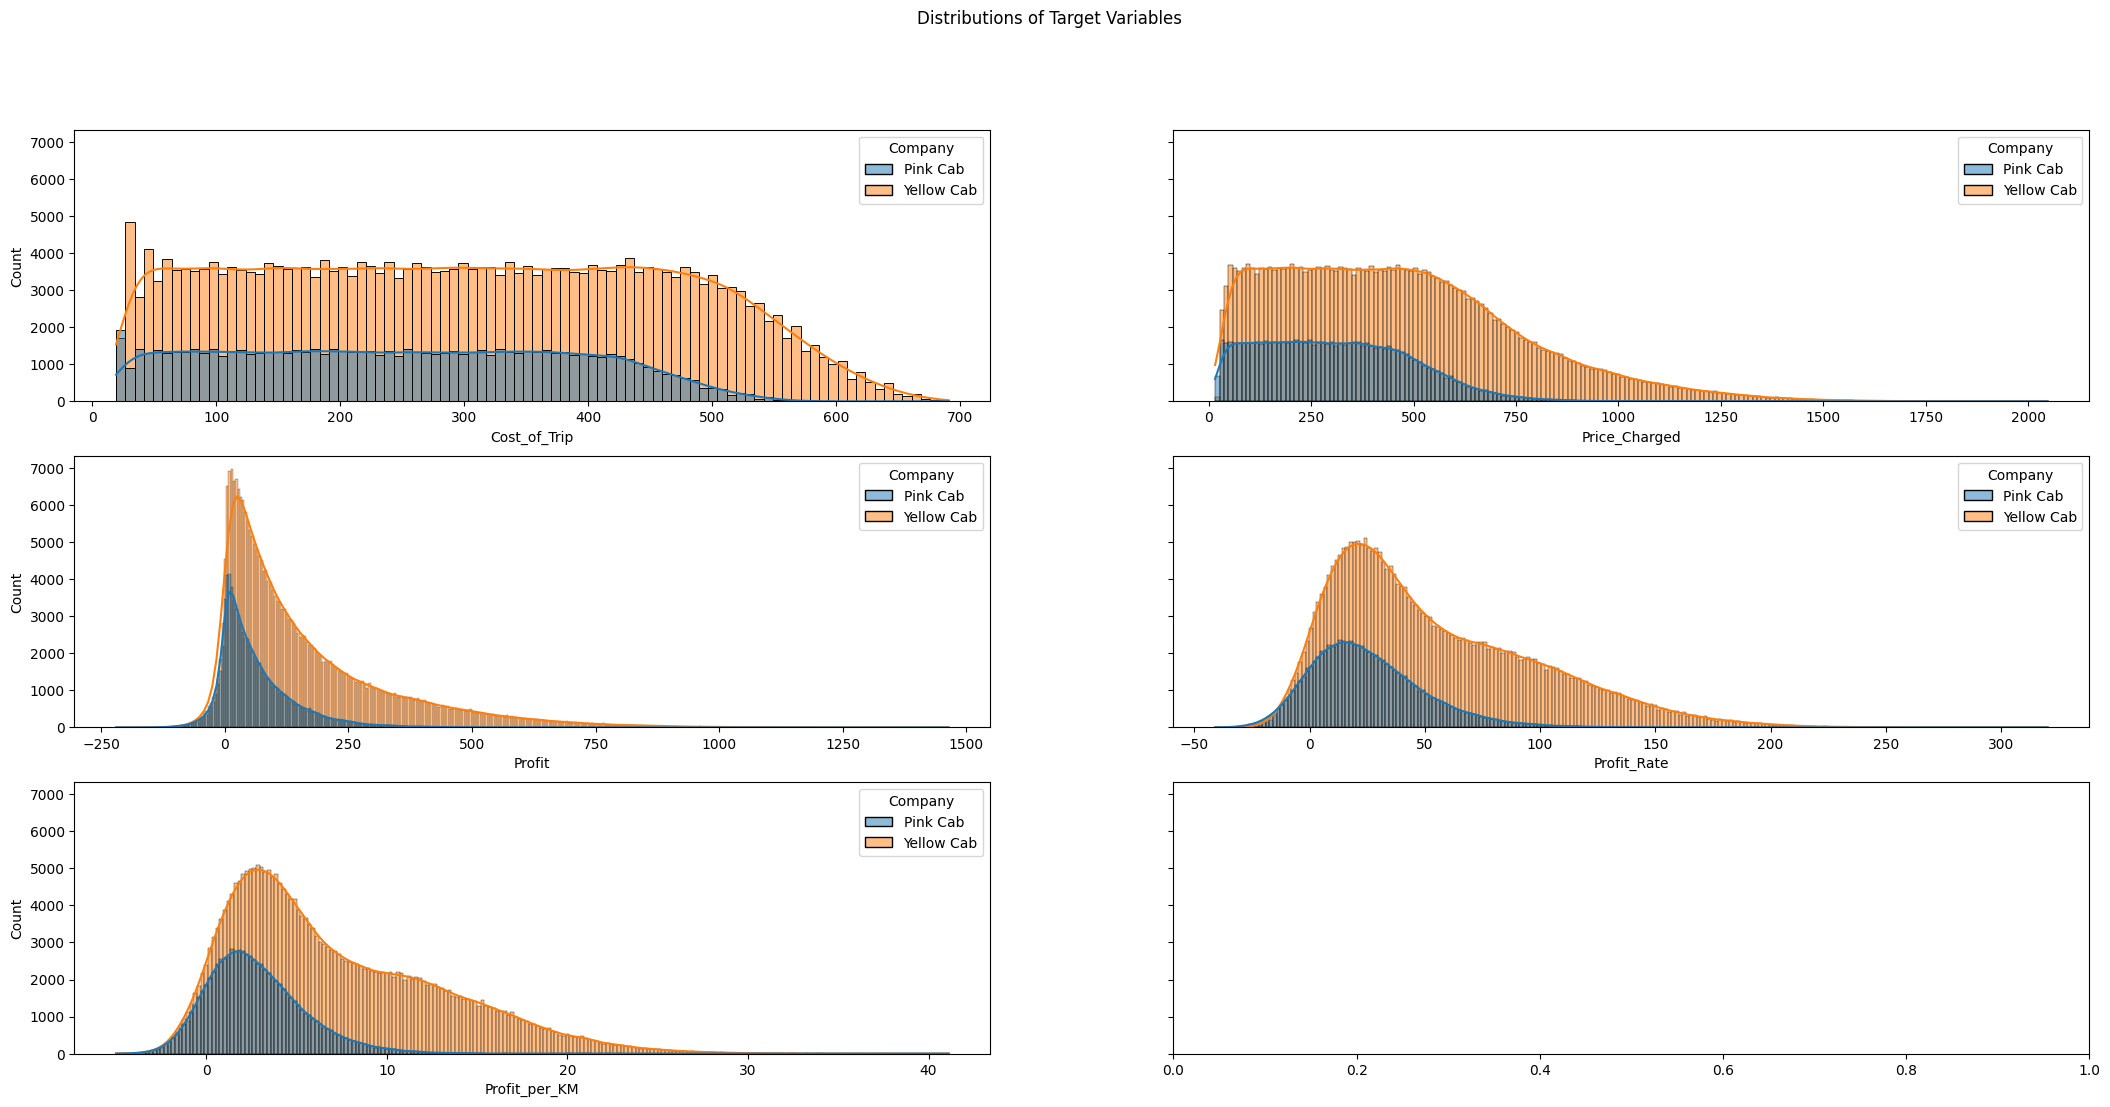

In [ ]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=Merged_Data , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=Merged_Data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=Merged_Data , x='Profit' , kde = True , hue="Company")
sns.histplot(ax=axes[1,1], data=Merged_Data , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=Merged_Data , x='Profit_per_KM' , kde = True , hue="Company")

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
Year                                      
2016     27.659727   56.719546   50.864915
2017     26.953767   56.683707   50.586278
2018     20.299244   48.580138   42.682884


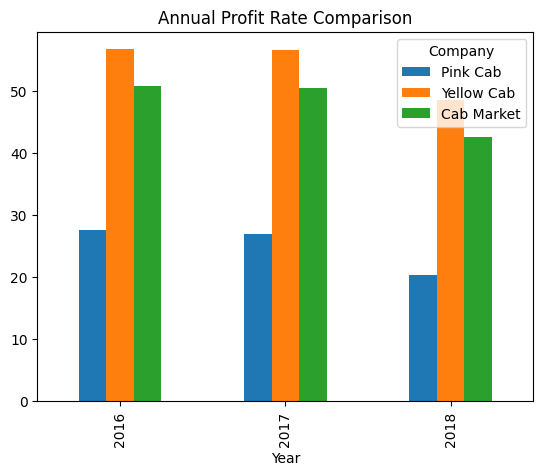

In [ ]:
Annual_Profit_Rate = Merged_Data.groupby(['Year','Company']).Profit.sum().unstack()/Merged_Data.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = Merged_Data.groupby(['Year']).Profit.sum()/Merged_Data.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

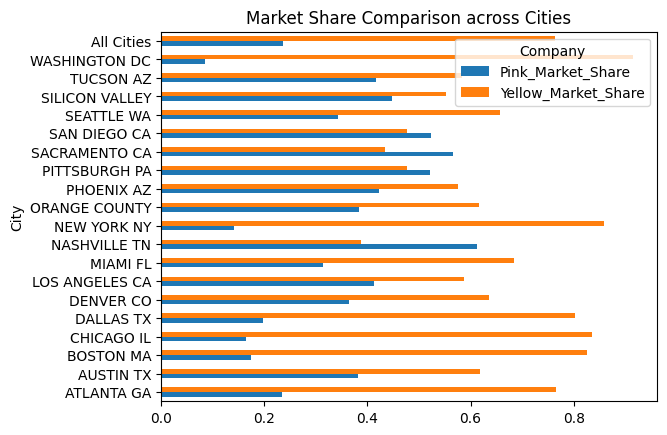

In [ ]:
Company_Transaction = Merged_Data.groupby(['City','Company']).Transaction_ID.count().unstack()
Company_Transaction.loc['All Cities'] = Company_Transaction.sum(numeric_only=True)
Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab']/Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab']/Company_Transaction['City_Market']
ax = Company_Transaction.iloc[:,3:5].plot(kind='barh',stacked = False, title = 'Market Share Comparison across Cities')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
Data = Merged_Data.drop(['Transaction_ID', 'Customer_ID'], axis=1)
le = LabelEncoder()
Data["Gender"] = le.fit_transform(Data["Gender"])
Data["City"] = le.fit_transform(Data["City"])
Data["Payment_Mode"] = le.fit_transform(Data["Payment_Mode"])
Pink_Data = Data[Data['Company'] == 'Pink Cab']
Yellow_Data = Data[Data['Company'] == 'Yellow Cab']
Data["Company"] = le.fit_transform(Data["Company"])
Data

,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Profit,Profit_Rate,Profit_per_KM,User_Ratio
0,2016-08-01,0,0,30.45,370.95,313.6350,0,1,28,10813,814885,24701,2016,8,57.3150,18.274427,1.882266,3.031225
1,2018-07-21,1,0,26.19,598.70,317.4228,1,1,28,10813,814885,24701,2018,7,281.2772,88.612790,10.739870,3.031225
2,2018-11-23,1,0,42.55,792.05,597.4020,0,1,28,10813,814885,24701,2018,11,194.6480,32.582415,4.574571,3.031225
3,2016-06-01,0,0,28.62,358.52,334.8540,0,1,27,9237,814885,24701,2016,6,23.6660,7.067558,0.826904,3.031225
4,2018-04-21,1,0,36.38,721.10,467.1192,0,1,27,9237,814885,24701,2018,4,253.9808,54.371732,6.981330,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344743,2018-03-03,1,18,38.40,668.93,525.3120,1,0,29,6829,418859,127001,2018,3,143.6180,27.339562,3.740052,30.320705
344744,2018-04-13,1,18,3.57,67.60,44.5536,1,0,29,6829,418859,127001,2018,4,23.0464,51.727358,6.455574,30.320705
344745,2018-06-07,1,18,23.46,331.97,337.8240,0,0,29,6829,418859,127001,2018,6,-5.8540,-1.732855,-0.249531,30.320705
344746,2018-02-08,1,18,27.60,358.23,364.3200,1,0,29,6829,418859,127001,2018,2,-6.0900,-1.671607,-0.220652,30.320705


Text(0, 0.5, 'Yellow Cab')

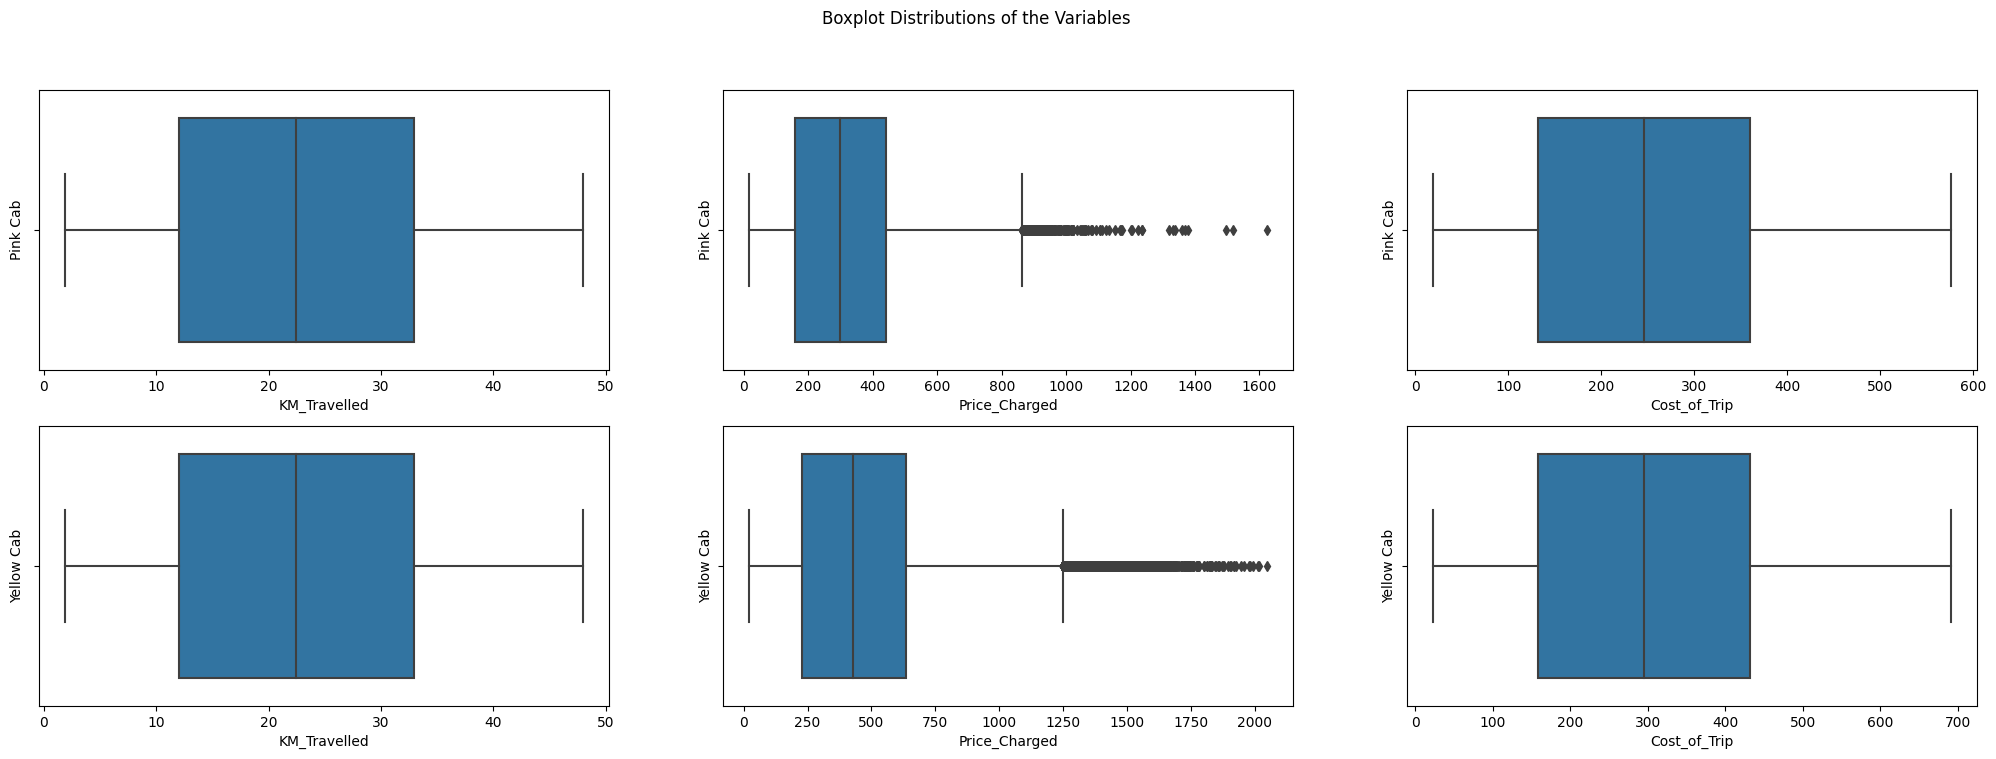

In [ ]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

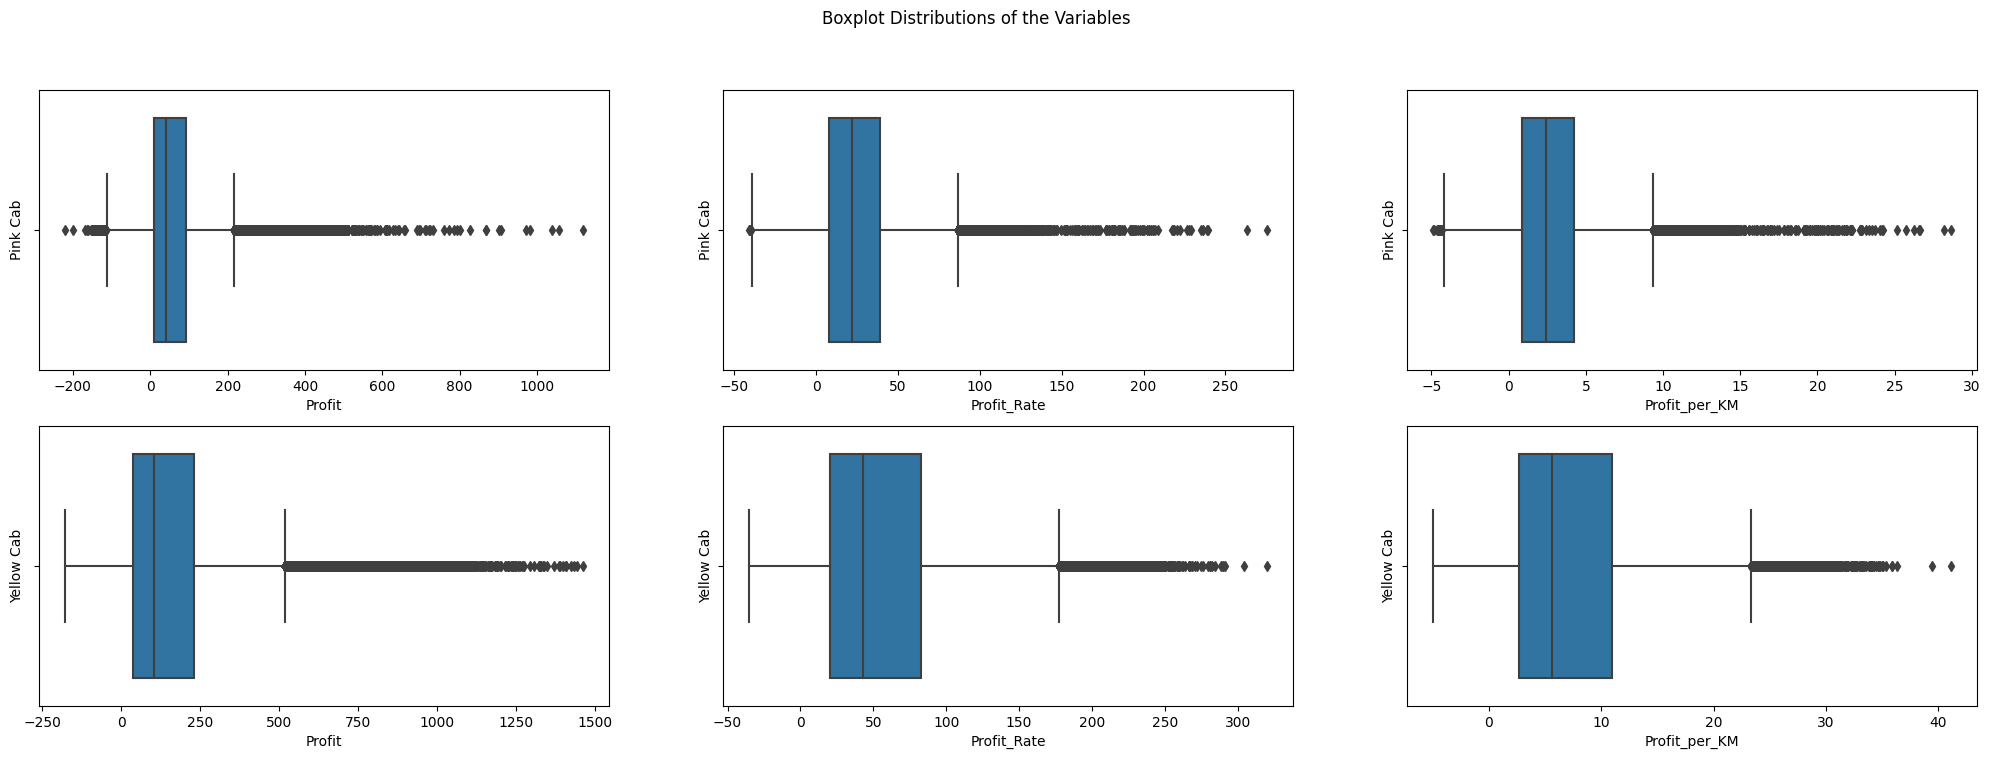

In [ ]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Profit' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Profit_Rate' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Profit_per_KM' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Profit' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Profit_Rate' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Profit_per_KM' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

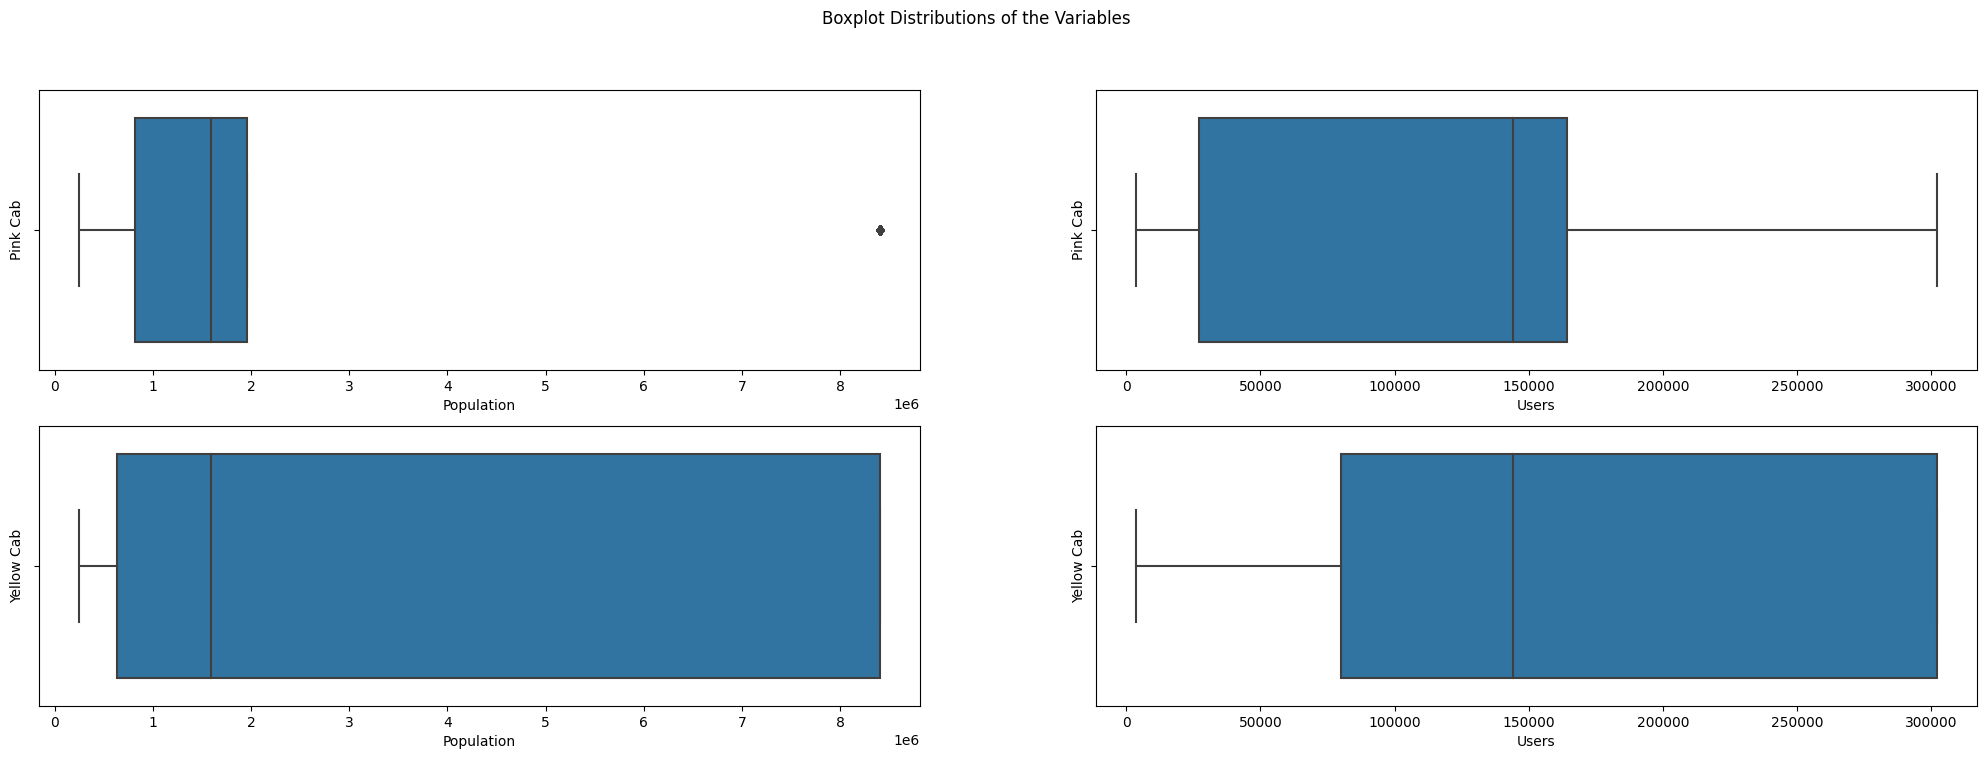

In [ ]:
fig,axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Population' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Users' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Population' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Users' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

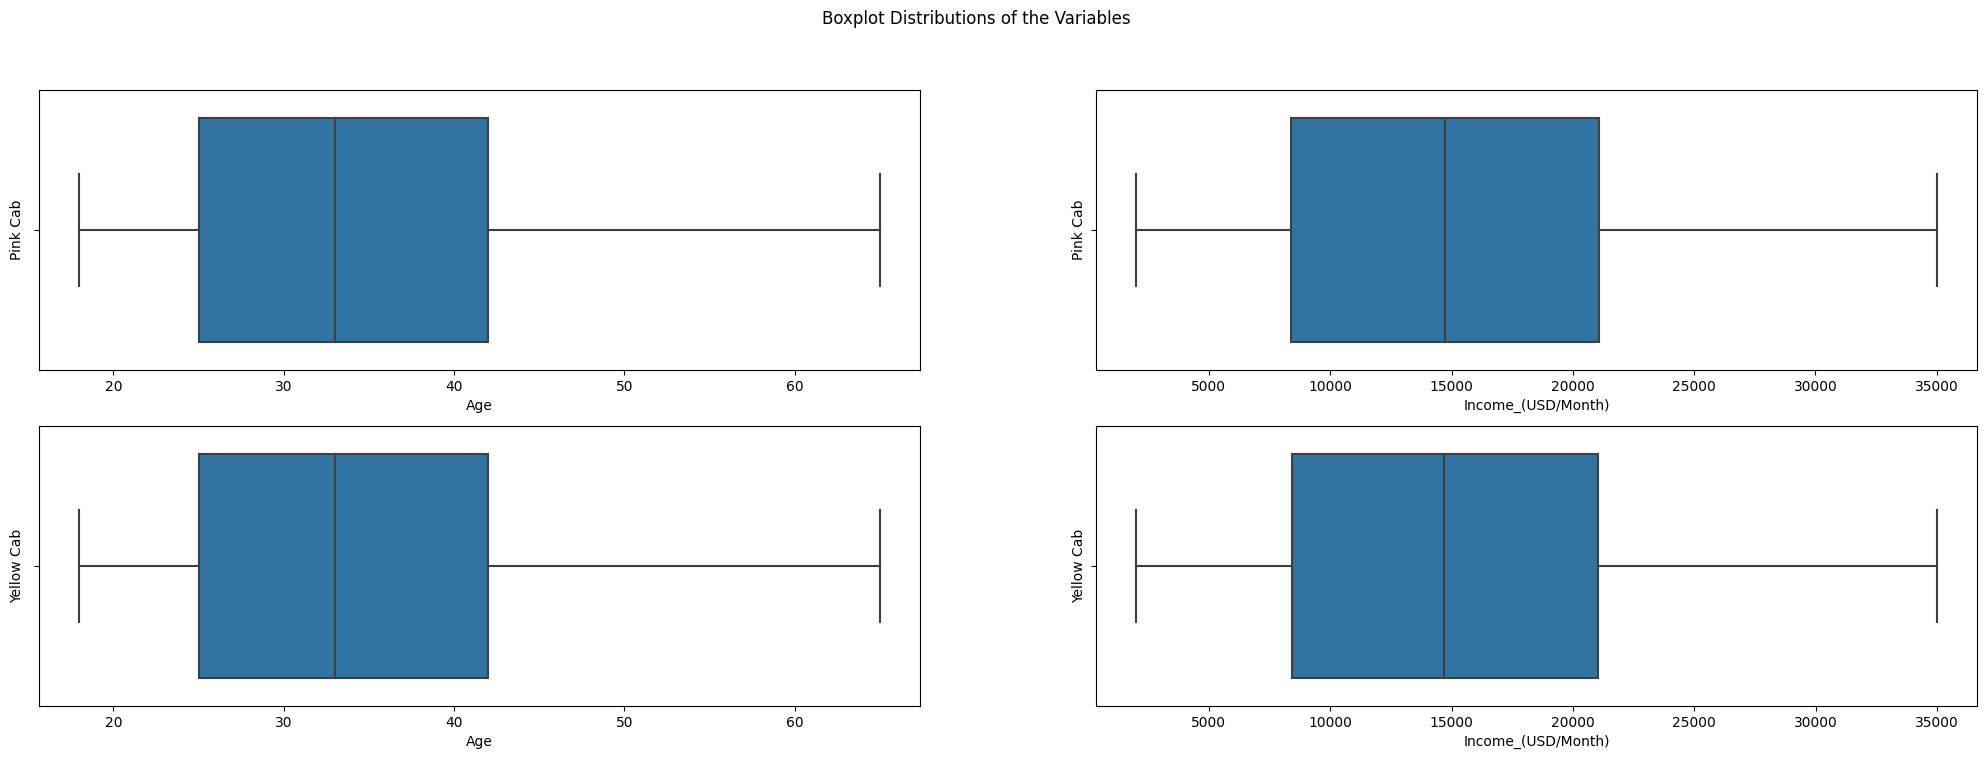

In [ ]:
fig,axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

In [ ]:
Customer_Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data = Customer_Merged_Data[['Company', 'Customer ID','Gender']]

In [ ]:
Customer_Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data = Customer_Merged_Data[['Company', 'Customer ID','Gender']]
Customer_Merged_Data = Customer_Merged_Data.drop_duplicates()
Customer_Gender = Customer_Merged_Data.groupby(['Company', 'Gender']).count().unstack()
Customer_Gender['Female_Rate'] = Customer_Gender.iloc[:,0] / (Customer_Gender.iloc[:,0] + Customer_Gender.iloc[:,1])
print(Customer_Gender)

           Customer ID        Female_Rate
Gender          Female   Male            
Company                                  
Pink Cab         14570  17207    0.458508
Yellow Cab       18112  21198    0.460748


In [ ]:
Customer_Merged_Data_2 = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data_2['Year'] = Customer_Merged_Data_2['Date'].dt.year
Customer_Merged_Data_2 = Customer_Merged_Data_2[['Company', 'Customer ID','Year']]
Customer_Merged_Data_2 = Customer_Merged_Data_2.drop_duplicates()
Yellow_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Yellow Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Pink_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Pink Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Customer_Loyalty = Customer_Merged_Data_2.groupby(['Customer ID','Year']).count().unstack()
#tmp = Customer_Loyalty[Customer_Loyalty['Company' == "Yellow Cab"]]
print("Customer Number of Yellow Cab")
print(Yellow_Customer_Merged_Data)
print("Customer Number of Pink Cab")
print(Pink_Customer_Merged_Data)
seq = np.arange(0.1,1,0.1)
print(Customer_Loyalty.describe(seq))

Customer Number of Yellow Cab
      Customer ID
Year             
2016        25937
2017        27789
2018        26032
Customer Number of Pink Cab
      Customer ID
Year             
2016        16661
2017        18643
2018        17029
            Company                            
Year           2016          2017          2018
count  31152.000000  33418.000000  31376.000000
mean       1.367424      1.389431      1.372418
std        0.482111      0.487629      0.483457
min        1.000000      1.000000      1.000000
10%        1.000000      1.000000      1.000000
20%        1.000000      1.000000      1.000000
30%        1.000000      1.000000      1.000000
40%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
60%        1.000000      1.000000      1.000000
70%        2.000000      2.000000      2.000000
80%        2.000000      2.000000      2.000000
90%        2.000000      2.000000      2.000000
max        2.000000      2.000000      2.0

<ipython-input-32-ac17467e6162>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = Data.corr()


<Axes: >

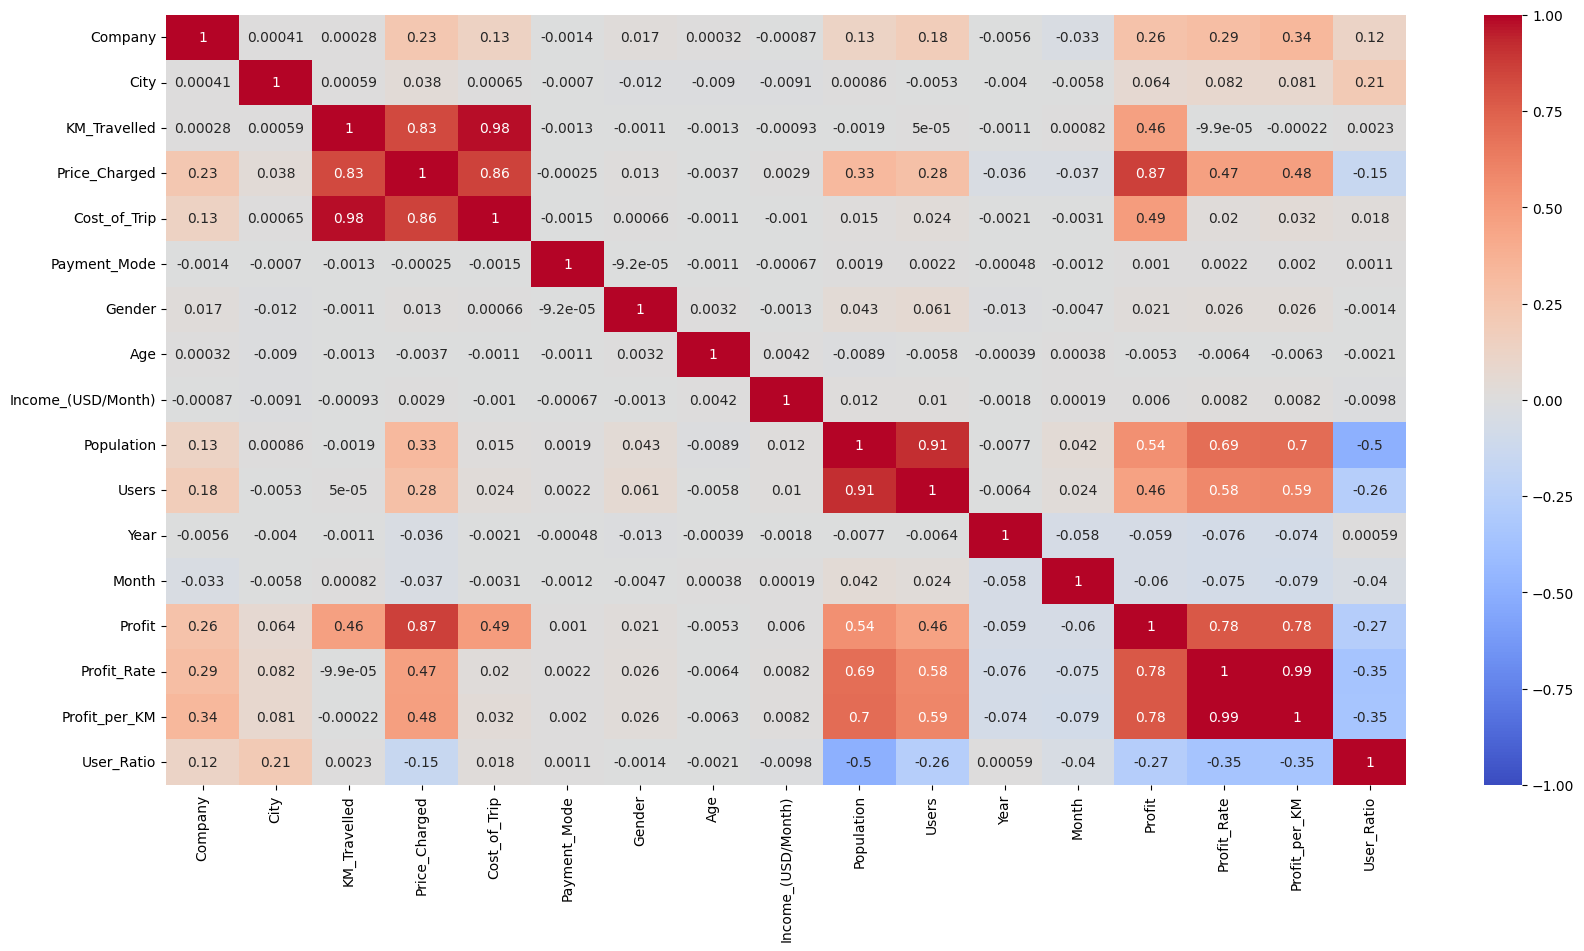

In [ ]:
Corr = Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<ipython-input-33-b8a90a01b795>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Pink_Corr = Pink_Data.corr()


<Axes: >

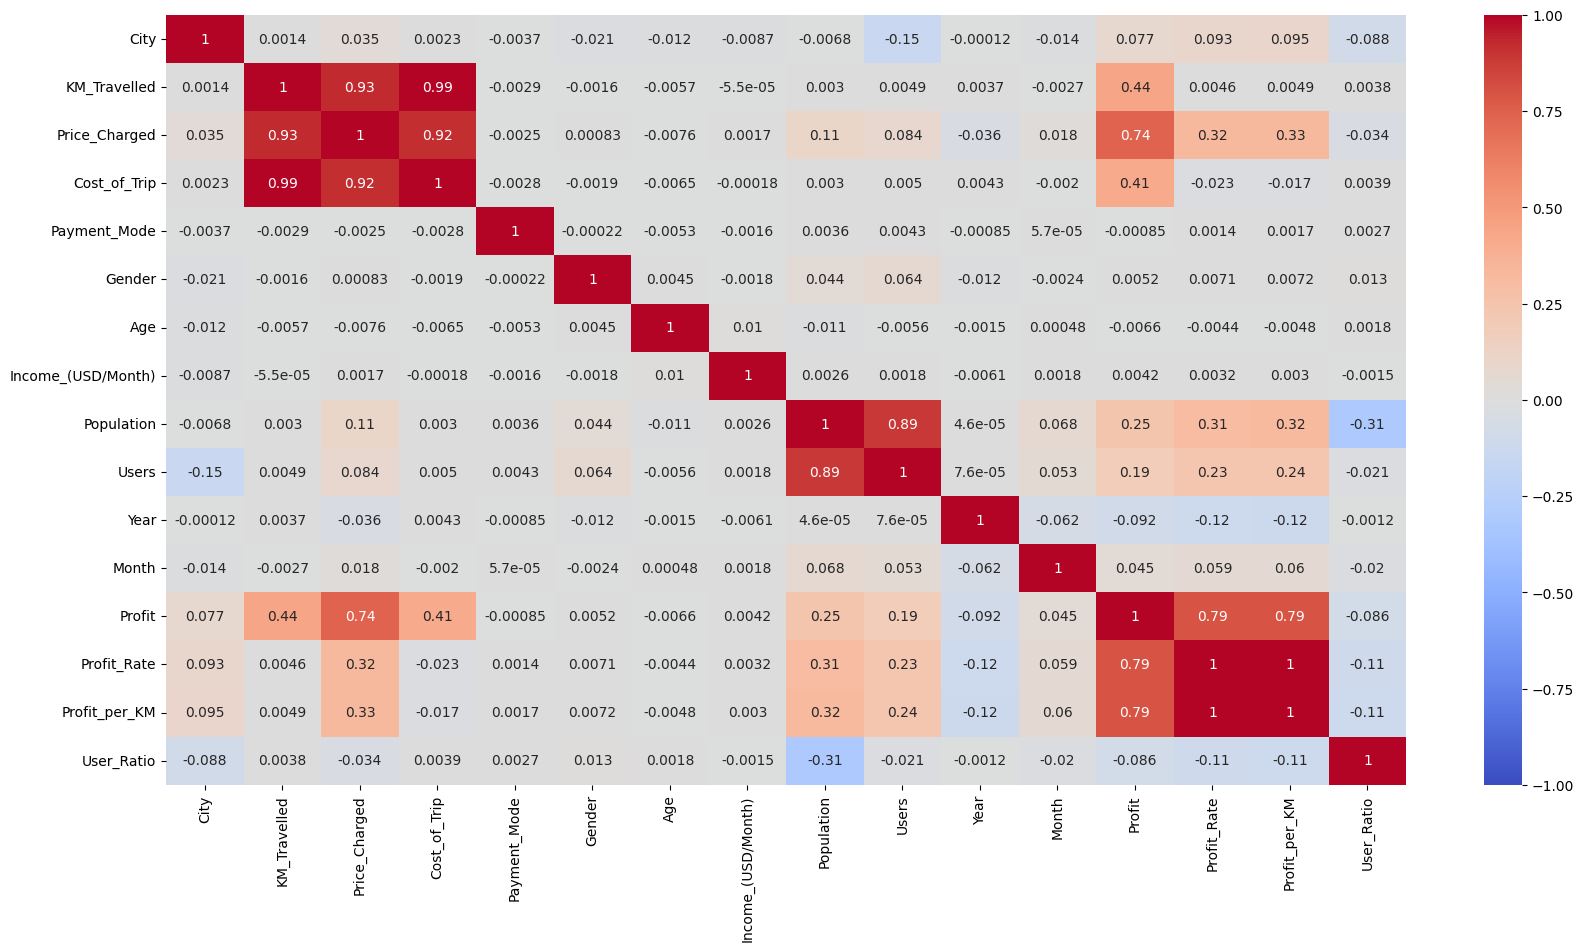

In [ ]:
Pink_Corr = Pink_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<ipython-input-34-82bd28c13ea3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Yellow_Corr = Yellow_Data.corr()


<Axes: >

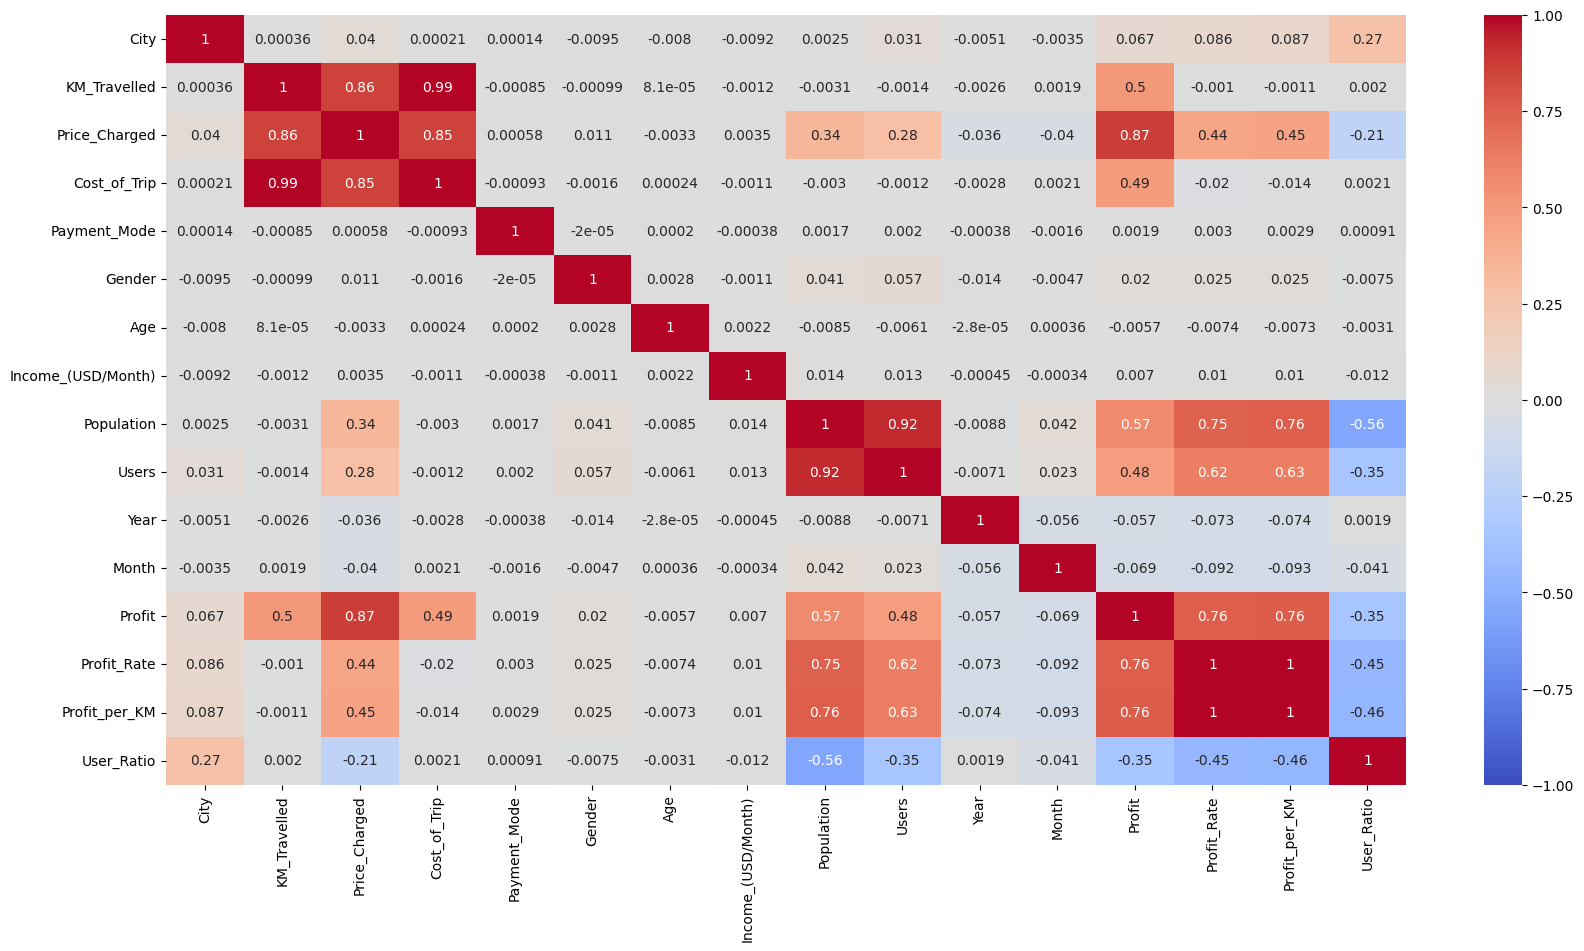

In [ ]:
Yellow_Corr = Yellow_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')